##### 2-Dimensional Strip Packing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rmax = 10
tmax = 12
tasks = 15

df = pd.DataFrame({
    'ti': np.random.randint(1, tmax, size=tasks),
    'ri': np.random.randint(1, 4, size=tasks)
})
df

,ri,ti
0,1,1
1,1,1
2,1,9
3,3,3
4,2,10
5,2,10
6,1,7
7,1,6
8,2,10
9,2,10


In [3]:
def nfdh(tasks, W):
    df = tasks.sort_values(by='ti', ascending=False)
    df = df.reset_index(drop=True)
    
    level = 0
    time = [[df.ti[0]]]
    rank = [[df.ri[0]]]
    tmax = [df.ti[0]]
        
    for i, y in df[1:].iterrows():
        if W - np.sum(rank[level]) >= y.ri:
            rank[level].append(y.ri)
            time[level].append(y.ti)
        else:
            level += 1
            tmax.append(y.ti + tmax[level - 1])
            time.append([y.ti])
            rank.append([y.ri])
    
    return pd.DataFrame({
        'rank': rank,
        'time': time,
        'tmax': tmax
    }, columns=['rank', 'time', 'tmax'])

table = nfdh(df, W=rmax)
table

,rank,time,tmax
0,"[3, 2, 2, 2]","[11, 11, 10, 10]",11
1,"[2, 2, 1, 3, 1]","[10, 10, 9, 8, 7]",21
2,"[3, 1, 3, 2, 1]","[7, 6, 3, 3, 1]",28
3,[1],[1],29


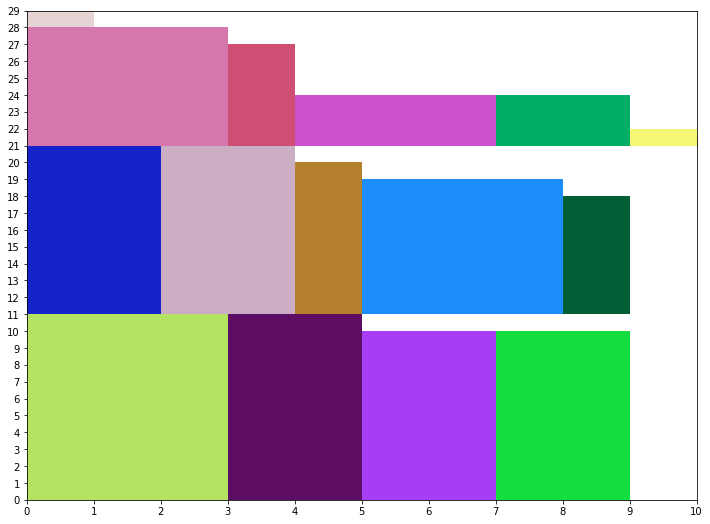

In [4]:
fig, ax = plt.subplots(figsize=(12, 9))

tmax = np.max(table.tmax)
plt.xlim([0, rmax])
plt.ylim([0, tmax])

plt.xticks(np.arange(0, rmax+1))
plt.yticks(np.arange(0, tmax+1))

x, y = 0, 0
for level, row in table.iterrows():
    for dx, dy in zip(row['rank'], row['time']):
        ax.add_patch(plt.Rectangle((x, y), dx, dy, fc=np.random.rand(3)))
        x += dx
    x, y = 0, row.tmax
plt.show()

In [5]:
def ffdh(tasks, W):
    df = tasks.sort_values(by='ti', ascending=False)
    df = df.reset_index(drop=True)

    level = 0
    time = [[df.ti[0]]]
    rank = [[df.ri[0]]]
    tmax = [df.ti[0]]
    
    for i, y in df[1:].iterrows():
        index = -1
        for i in range(level + 1):
            if W - np.sum(rank[i]) >= y.ri:
                index = i
                break
        
        if index != -1:
            rank[index].append(y.ri)
            time[index].append(y.ti)
        else:
            level += 1
            tmax.append(y.ti + tmax[level - 1])
            time.append([y.ti])
            rank.append([y.ri])
    
    return pd.DataFrame({
        'rank': rank,
        'time': time,
        'tmax': tmax
    }, columns=['rank', 'time', 'tmax'])

table = ffdh(df, W=rmax)
table

,rank,time,tmax
0,"[3, 2, 2, 2, 1]","[11, 11, 10, 10, 9]",11
1,"[2, 2, 3, 1, 1, 1]","[10, 10, 8, 7, 6, 1]",21
2,"[3, 3, 2, 1]","[7, 3, 3, 1]",28


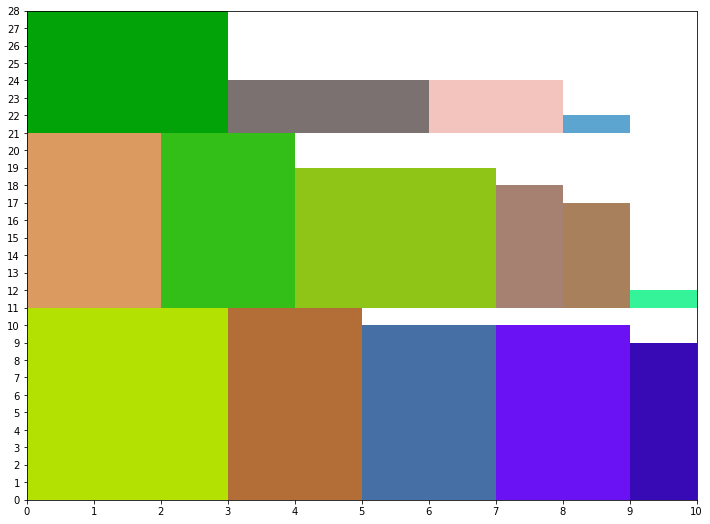

In [6]:
fig, ax = plt.subplots(figsize=(12, 9))

tmax = np.max(table.tmax)
plt.xlim([0, rmax])
plt.ylim([0, tmax])

plt.xticks(np.arange(0, rmax+1))
plt.yticks(np.arange(0, tmax+1))

x, y = 0, 0
for level, row in table.iterrows():
    for dx, dy in zip(row['rank'], row['time']):
        ax.add_patch(plt.Rectangle((x, y), dx, dy, fc=np.random.rand(3)))
        x += dx
    x, y = 0, row.tmax
plt.show()